# Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePriceRecords.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/p5test/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/p5test'

---

# Load Data

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePriceRecords.csv"))
df.head()

1stFlrSF  BsmtFinSF1  BsmtUnfSF  GarageArea  GrLivArea KitchenQual  \
0       856         706        150         548       1710          Gd   
1      1262         978        284         460       1262          TA   
2       920         486        434         608       1786          Gd   
3       961         216        540         642       1717          Gd   
4      1145         655        490         836       2198          Gd   

   LotArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0     8450           61            5            7          856       2003   
1     9600            0            8            6         1262       1976   
2    11250           42            5            7          920       2001   
3     9550           35            5            7          756       1915   
4    14260           84            5            8         1145       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [12]:
# from ydata_profiling import ProfileReport
# pandas_report = ProfileReport(df=df, minimal=True)
# pandas_report.to_notebook_iframe()

---


# Correlation Study

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 17)


1stFlrSF  BsmtFinSF1  BsmtUnfSF  GarageArea  GrLivArea  LotArea  \
0       856         706        150         548       1710     8450   
1      1262         978        284         460       1262     9600   
2       920         486        434         608       1786    11250   

   OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0           61            5            7          856       2003   
1            0            8            6         1262       1976   
2           42            5            7          920       2001   

   YearRemodAdd  SalePrice  KitchenQual_Gd  KitchenQual_TA  KitchenQual_Ex  \
0          2003     208500               1               0               0   
1          1976     181500               0               1               0   
2          2002     223500               1               0               0   

   KitchenQual_Fa  
0               0  
1               0  
2               0

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [7]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
OpenPorchSF       0.477561
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [8]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
BsmtFinSF1        0.386420
Name: SalePrice, dtype: float64

For both methods, we notice TBC or TBC levels of correlation between SalePrice and a given variable. 
* Ideally, we pursue strong correlation levels. However, this is not always possible.

We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Therefore we are studying at df the following variables. We will investigate if:
* tbc
* tbc
* tbc
* tbc
* tbc

In [11]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

# EDA on selected variables

We plot the distribution (numerical) coloured by Sale Price

In [19]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

1stFlrSF  GarageArea  GrLivArea  OverallQual  TotalBsmtSF  YearBuilt  \
0       856         548       1710            7          856       2003   
1      1262         460       1262            6         1262       1976   
2       920         608       1786            7          920       2001   

   SalePrice  
0     208500  
1     181500  
2     223500

## Variables Distribution by Sale Price

We plot the distribution (numerical and categorical) coloured by SalePrice

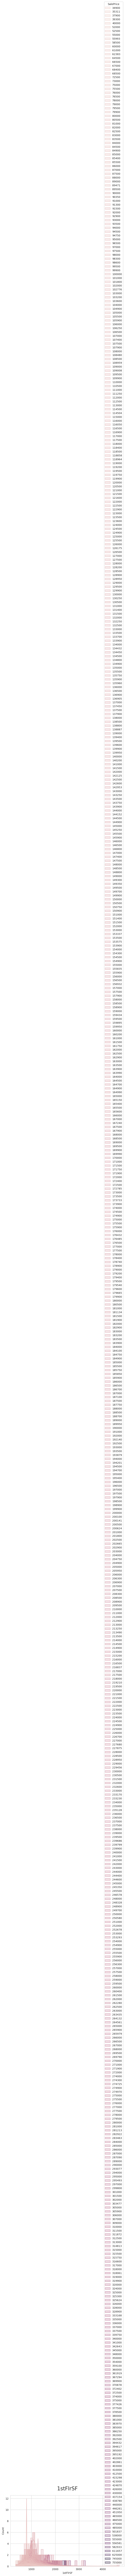

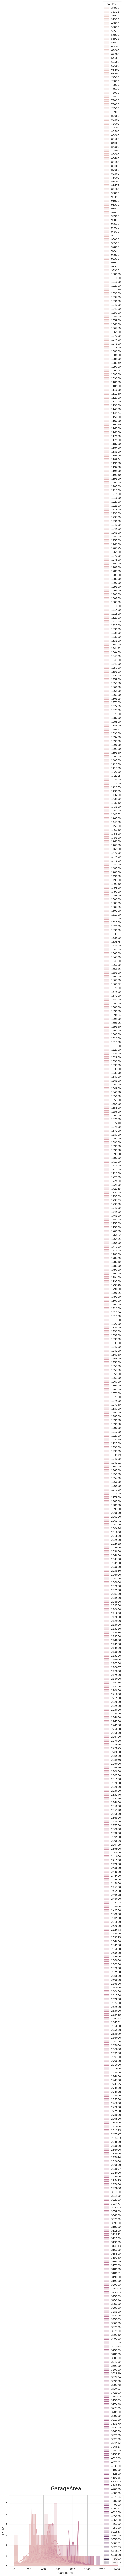

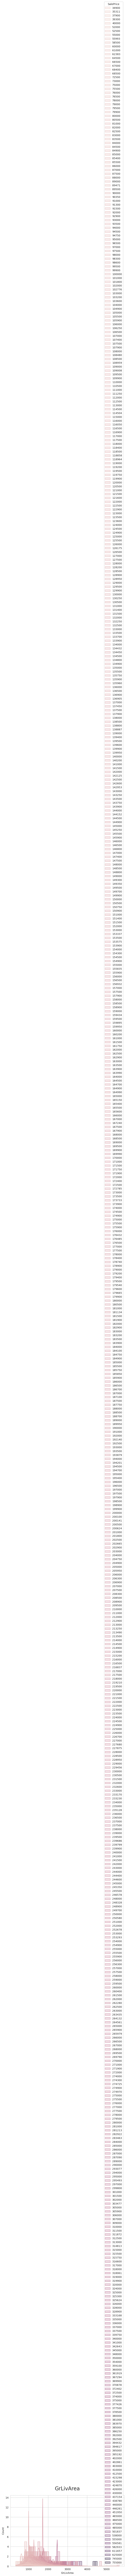

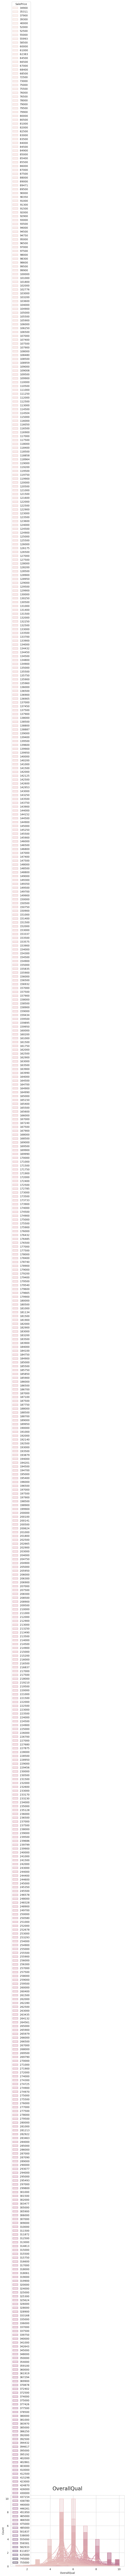

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")
